# Complex Engineering Problem
## ES 304(B) - Linear Algebra II

**Group Members:**
1) Syed Muhammad Ashhar Shah
2) Khizar Ali Shah
3) Arbaz Khan
4) Isaam Ul Haq
___

## Libraries
Here we are importing the libraries that we will use for this project.

**Libraries and Their Purpose:**
* *CV2*: We will use this to import the image into our notebook for processing
* *Numpy*: We shall use this to do store the image data as an N-Dimensional array.
* *Matplotlib*: This is use to display the image onto the screen.
* *Sklearn*: A machine learning library that contains the PCA methods that we shall use in this project for image analysis.


In [1]:
import numpy as np
from matplotlib.image import imread
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt
import cv2
from PIL import Image
#from sklearn.decomposition import PCA, IncrementalPCA

import os
from glob import glob
#import geopandas as gpd
import xarray as xr
import rioxarray as rxr
#import earthpy as et
#import earthpy.spatial as es
import earthpy.plot as ep

### Collecting The Bands
Here we are collecting all the bands of the landstat image so that we can open them and perform various operations on them.
___

In [2]:
inputPath = '/home/ashhar/Desktop/CEP_Project/Landstat-Images'

In [3]:
bandList = [band for band in os.listdir(inputPath) if band[-4:]=='.TIF']
bandList.sort()
bandList

['LC08_L1TP_149038_20211218_20211223_01_T1_B1.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B10.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B11.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B2.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B3.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B4.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B5.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B6.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B7.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B8.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B9.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_BQA.TIF']

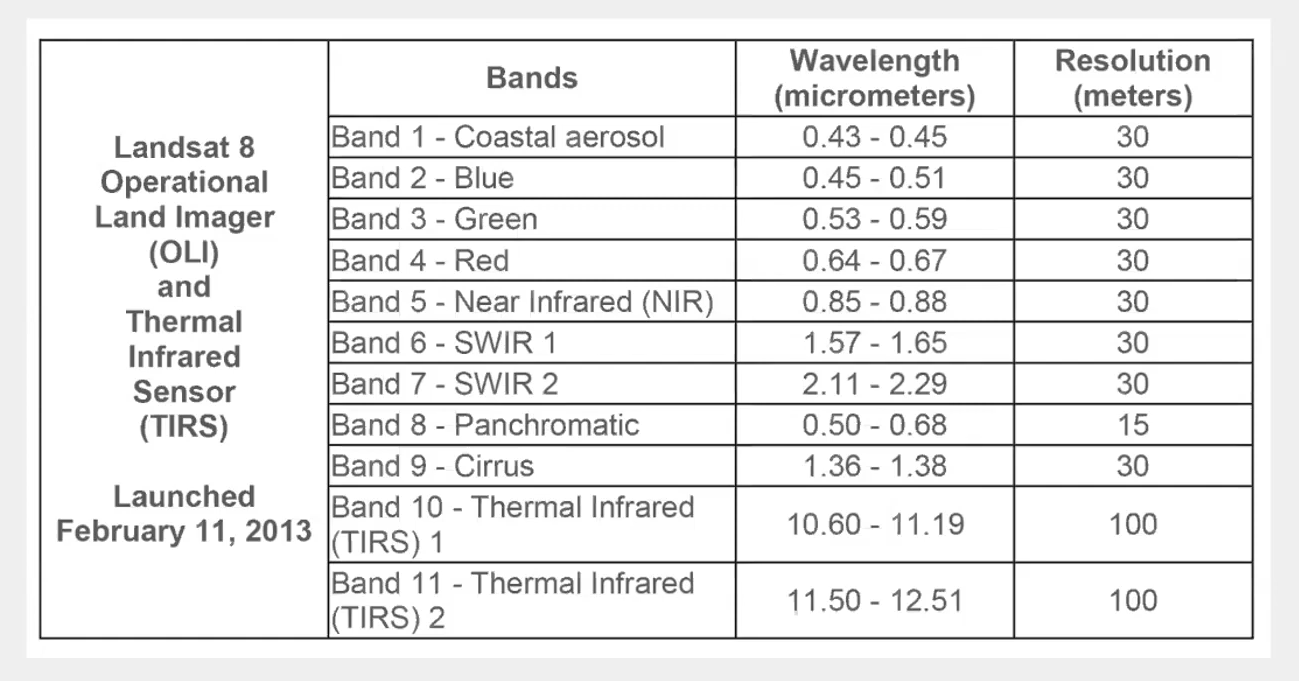

In [4]:
bandList.pop(11)
bandList.pop(9)
bandList.pop(2)
bandList.pop(1)
bandList

['LC08_L1TP_149038_20211218_20211223_01_T1_B1.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B2.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B3.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B4.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B5.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B6.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B7.TIF',
 'LC08_L1TP_149038_20211218_20211223_01_T1_B9.TIF']

In [5]:
# opening the first image and displaying it
img = cv2.imread('Landstat-Images/' + str(bandList[0]))
print(img.shape)

(7851, 7711, 3)


Above we can see that the image we have recieved has been stored as a numpy object 7851x7711 being the pixel resolution of the image

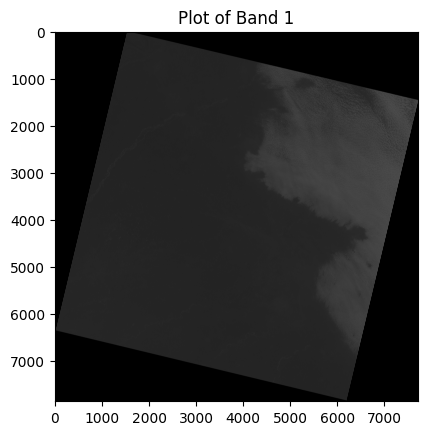

In [6]:
plt.title('Plot of Band 1')
plt.imshow(img)

### Analyzing all the Bands
Now we will open all the bands and display them in one plot for visual comparison

In [7]:
# function to return the opening image
def getbands(path):
    img = cv2.imread('Landstat-Images/' + str(path))
    return img

In [8]:
# opening all the band image saving them into one list
bands = []
i = 0
for i, aband in enumerate(bandList):
    bands.append(getbands(aband))
    print('Processed Band: ' + str(i))

Processed Band: 0
Processed Band: 1
Processed Band: 2
Processed Band: 3
Processed Band: 4
Processed Band: 5
Processed Band: 6
Processed Band: 7


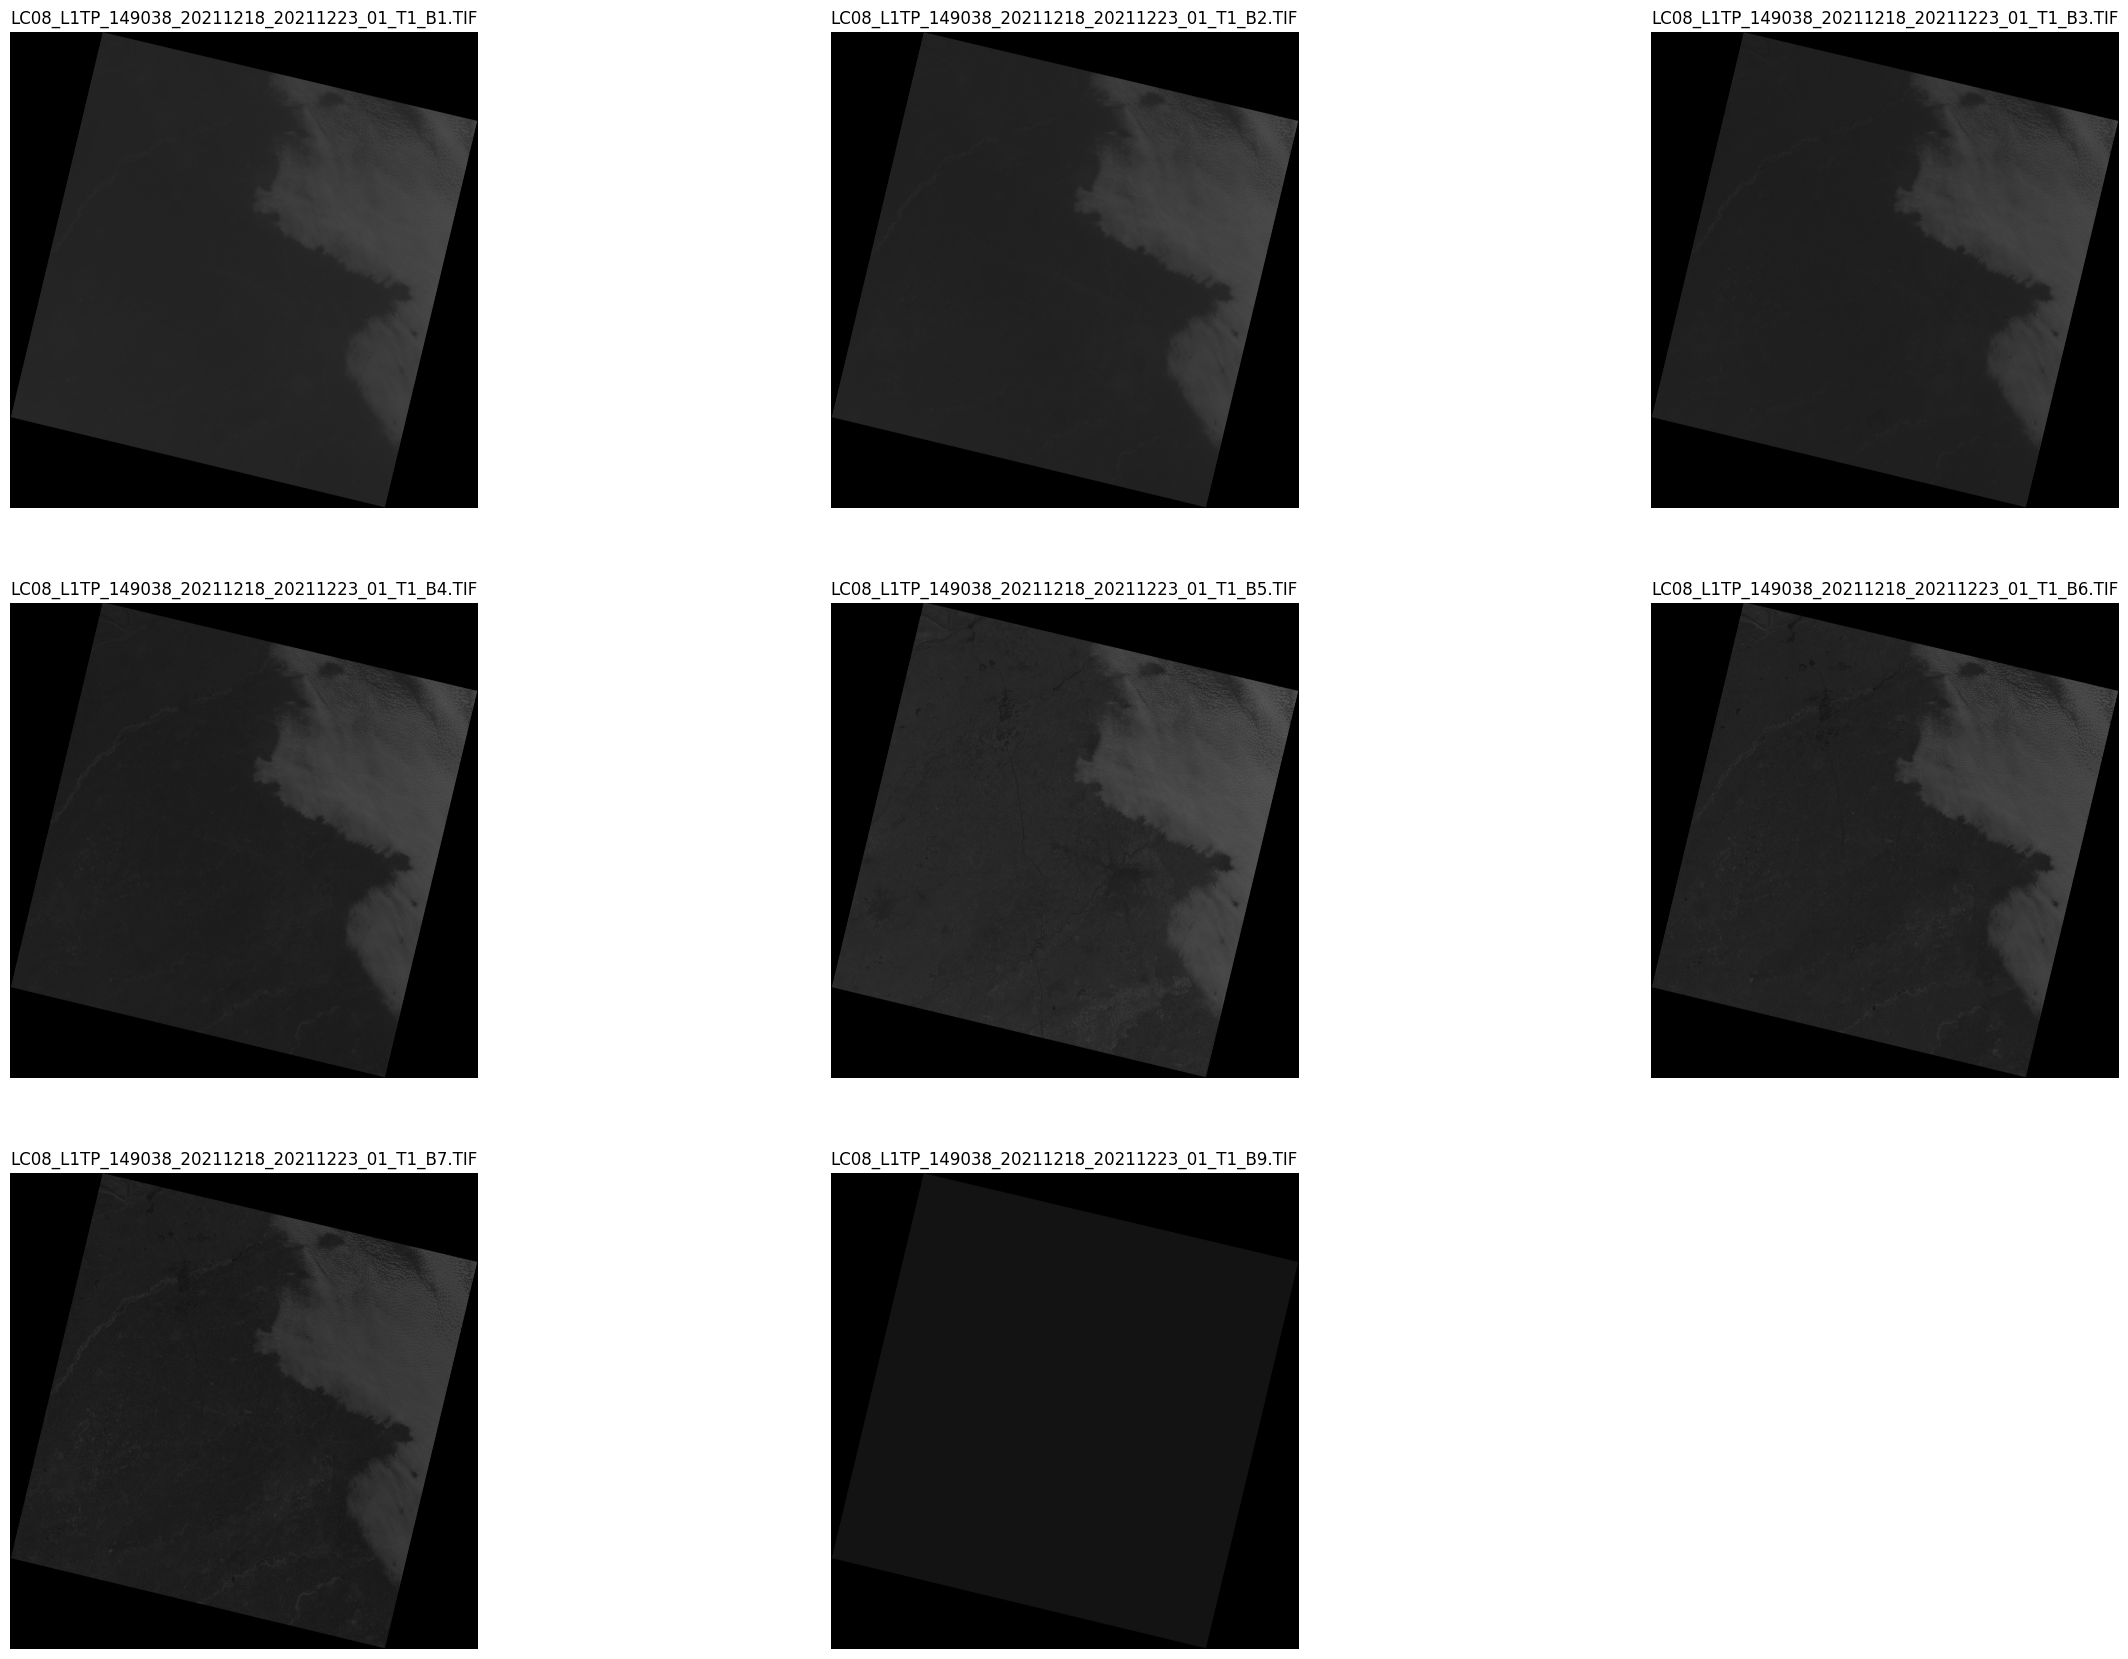

In [9]:
# plotting all the bands for visual analysis
fig = plt.figure(figsize=(30, 21))
rows = 3
columns = 3
for i, aband in enumerate(bands):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aband)
    plt.axis('off')
    plt.title(bandList[i])

Above shown are all the individual bands contained in the Landstat image.

### Merging The Bands
Now we will merge all the bands to form a single colored image. To do this we shall take the help of the following libraries:
* xarray
* earthpy

In [10]:
# we see that the object in which we have stored the data is a list
type(bands)

list

In [11]:
bands_arr = np.array(bands)

In [12]:
bands_arr.shape

(8, 7851, 7711, 3)

Here we can see that when we convert our list into a numpy array it is not in the standard rasterio order which is used by the **ep.plot_rgb()** method. Hence we shall have to reshape it and convert it into an xarray object for it to be used by the following method.

### Converting the image into a single X-Array object.

In [5]:
# function that returns the numpy values of the pixels in (x,y) format ignoring the RGB column
def openAsXarr(band_path):
    return rxr.open_rasterio('Landstat-Images/' + str(band_path)).squeeze()

In [6]:
# opening all the bands
x_arr_bands = []
for i, aband in enumerate(bandList):
    x_arr_bands.append(openAsXarr(aband))
    if(i == 7):
        x_arr_bands[i]["band"]= 9
        break
    x_arr_bands[i]["band"]=i+1 # labeling them on the bases of their title

In [7]:
# converting the N-D Xarray into a 1-D Xarray
landstat_image = xr.concat(x_arr_bands, dim="band")

Here we can see that we have data collected of a total of 8 bands (1,2,3,4,5,6,7,9). The rest of the bands we have ignored due to difference in dimensions. All bands form a image of pixels 7851x7711. 

In [8]:
print(landstat_image)

<xarray.DataArray (band: 8, y: 7851, x: 7711)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, 

## Merging The Image
Now we shall use the plot_rgb() method from earthpy library to merge all the bands into a single landstat image.

In [ ]:
my_dpi=96
merged_image = plt.figure(figsize=(7711/my_dpi, 7851/my_dpi), dpi=my_dpi)
ax = ep.plot_rgb(landstat_image.values,rgb=[3, 2, 1],title="Landstat Image")
plt.show()
plt.savefig ("./my_img.png")
plt.close()

<Figure size 7711x7851 with 0 Axes>

In [ ]:
np_merged_img = mplfig_to_npimage(merged_image)

In [ ]:
print(np_merged_img)
print('Shape Of Image Array: ' + str(np_merged_img.shape))

## Comparison With Orignal Image
We will now load the orignal landstat image that we got from NASA for a comparison.

In [ ]:
# Loading the image
img = cv2.imread('Image/LC08_L1TP_149038_20211218_20211223_01_T1.tif')
plt.imshow(img)

In [ ]:
print(img.shape)

In [ ]:
# creating a image object
im1 = Image.open(r'Image/LC08_L1TP_149038_20211218_20211223_01_T1.tif')
# get bands of image
im2 = im1.getbands()
# print band names.
print(im2)